# Which one is a better plan?

We are analyzing  the telecom operator Megaline. The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.

We are going to carry out a preliminary analysis of the plans based on a relatively small client selection. We'll have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. We analyze the clients' behavior and determine which prepaid plan brings in more revenue.

## Goal:
Test two hypotheses:

1. Test statistical hypotheses Ultimate and Surf calling plans
2. Test statistical hypotheses NY-NJ area and the users from other regions


## Plan:
1. Colecting the data
2. Prepare the data and exploring the data
3. Aggregate data per user
4. Study user behaviour
5. Test statistical hypotheses
6. General conclusion

# Initialization

In [2]:
# Loading all the libraries
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Load data

In [3]:
# Colecting data

df_calls = pd.read_csv("/datasets/megaline_calls.csv")
df_internet = pd.read_csv("/datasets/megaline_internet.csv")
df_messages = pd.read_csv("/datasets/megaline_messages.csv")
df_plans =pd.read_csv("/datasets/megaline_plans.csv")
df_users = pd.read_csv("/datasets/megaline_users.csv")

# Prepare the data

The data for this project is split into several tables.Let's explore each one to get an initial understanding of the data and do necessary corrections to each table if necessary.

## Plans

In [3]:
# Print the general/summary information about the plans' DataFrame
df_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
usd_monthly_pay          2 non-null int64
usd_per_gb               2 non-null int64
usd_per_message          2 non-null float64
usd_per_minute           2 non-null float64
plan_name                2 non-null object
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [4]:
# Print a sample of data for plans
df_plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


Describe what we see and notice in the general information and the printed data sample for the above price of data.

Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes?

How that can be fixed?

- The Dataset have 2 entries which is represented 2 plan surf and ultimate.
- There is no missing values and inappropriate data types 

## Users

In [5]:
# Print the general/summary information about the users' DataFrame
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
first_name    500 non-null object
last_name     500 non-null object
age           500 non-null int64
city          500 non-null object
reg_date      500 non-null object
plan          500 non-null object
churn_date    34 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [6]:
# Print a sample of data for users
df_users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN



- Dataset have missing values in column 'churn_data' represented by NaN and will be replaced based on documentation
-  Data in column 'reg_date'is object which is will be convert to Timestamp

In [7]:
 # Percentage of missing values
missing_values=df_users.isnull().sum()
missing_values[missing_values>0]/len(df_users)*100

churn_date    93.2
dtype: float64

### Fix Data

Fixing obvious issues with the data given the initial observations

In [8]:
# Convert to Timestamps column 'reg_date'
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'],format ='%Y-%m-%d' )

In [9]:
# Check it if works
type(df_users.reg_date[0])

pandas._libs.tslibs.timestamps.Timestamp

In [10]:
# Convert to Timestamps
#df_users['churn_date'] = pd.to_datetime(df_users['churn_date'],format ='%Y-%m-%d' )

In [11]:
df_users = df_users.sort_values(by= ['churn_date'], ascending = False)
df_users

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
54,1054,Denis,Frost,50,"Phoenix-Mesa-Chandler, AZ MSA",2018-04-21,surf,2018-12-31
186,1186,Josiah,Douglas,55,"Las Vegas-Henderson-Paradise, NV MSA",2018-12-22,ultimate,2018-12-31
40,1040,Paris,Santos,72,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",2018-12-23,surf,2018-12-30
129,1129,Marin,Bolton,70,"Baton Rouge, LA MSA",2018-11-10,surf,2018-12-27
402,1402,Jesus,Berry,25,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-06-11,surf,2018-12-26
...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaN
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaN
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaN
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaN


In [12]:
# Replace missing values based on identified parameter
df_users['churn_date'].fillna('0', inplace=True)

In [13]:
# Lets check it again
df_users.isnull().sum()

user_id       0
first_name    0
last_name     0
age           0
city          0
reg_date      0
plan          0
churn_date    0
dtype: int64

### Enrich Data

Adding additional factors to the data if you believe they might be useful

In [14]:
df_users

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
54,1054,Denis,Frost,50,"Phoenix-Mesa-Chandler, AZ MSA",2018-04-21,surf,2018-12-31
186,1186,Josiah,Douglas,55,"Las Vegas-Henderson-Paradise, NV MSA",2018-12-22,ultimate,2018-12-31
40,1040,Paris,Santos,72,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",2018-12-23,surf,2018-12-30
129,1129,Marin,Bolton,70,"Baton Rouge, LA MSA",2018-11-10,surf,2018-12-27
402,1402,Jesus,Berry,25,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-06-11,surf,2018-12-26
...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,0
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,0
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,0
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,0


## Calls

In [15]:
# Print the general/summary information about the calls' DataFrame

df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
id           137735 non-null object
user_id      137735 non-null int64
call_date    137735 non-null object
duration     137735 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [16]:
# Print a sample of data for calls
df_calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


Describe what we see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?

- The dataset have no missing values and inappropriate data types.
- The data in column 'call_date' represent as object so it will be converted to Timestamp.

### Fix data

Fix obvious issues with the data given the initial observations.

In [17]:
#Lets check column'call_date'
type(df_calls.call_date[0])

str

In [18]:
df_calls['call_date'].head()

0    2018-12-27
1    2018-12-27
2    2018-12-27
3    2018-12-28
4    2018-12-30
Name: call_date, dtype: object

In [19]:
# Convert to Timestamp
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'],format ='%Y-%m-%d' )


In [20]:
#Ckeck it if it works
type(df_calls.call_date[0])

pandas._libs.tslibs.timestamps.Timestamp

### Enrich data

Add additional factors to the data if you believe they might be useful.
- From column'call_date' will be extracted monthly calls and added in new column 'by_month'

In [21]:
# find month of year  the call was posted
#df_calls['by_month'] = df_calls['call_date'].dt.month_name()


In [22]:
# find month of year
#df_calls['by_month'] = df_calls['call_date'].astype('datetime64[M]')
df_calls['by_month'] = df_calls['call_date'].dt.month
df_calls

,id,user_id,call_date,duration,by_month
0,1000_93,1000,2018-12-27,8.52,12
1,1000_145,1000,2018-12-27,13.66,12
2,1000_247,1000,2018-12-27,14.48,12
3,1000_309,1000,2018-12-28,5.76,12
4,1000_380,1000,2018-12-30,4.22,12
...,...,...,...,...,...
137730,1499_199,1499,2018-11-21,8.72,11
137731,1499_200,1499,2018-10-20,10.89,10
137732,1499_201,1499,2018-09-21,8.12,9
137733,1499_202,1499,2018-10-10,0.37,10


In [23]:
#Ckeck it if it works
type(df_calls.call_date[0])

pandas._libs.tslibs.timestamps.Timestamp

In [24]:
#this applies the np.ceil method  to the column to round up its values and then converts them to integers
df_calls['duration'] = df_calls['duration'].apply(np.ceil).astype('int')
df_calls


,id,user_id,call_date,duration,by_month
0,1000_93,1000,2018-12-27,9,12
1,1000_145,1000,2018-12-27,14,12
2,1000_247,1000,2018-12-27,15,12
3,1000_309,1000,2018-12-28,6,12
4,1000_380,1000,2018-12-30,5,12
...,...,...,...,...,...
137730,1499_199,1499,2018-11-21,9,11
137731,1499_200,1499,2018-10-20,11,10
137732,1499_201,1499,2018-09-21,9,9
137733,1499_202,1499,2018-10-10,1,10


In [25]:
# Let's check it again
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 5 columns):
id           137735 non-null object
user_id      137735 non-null int64
call_date    137735 non-null datetime64[ns]
duration     137735 non-null int64
by_month     137735 non-null int64
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 5.3+ MB


## Messages

In [26]:
# Print the general/summary information about the messages' DataFrame
df_messages.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
id              76051 non-null object
user_id         76051 non-null int64
message_date    76051 non-null object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [27]:
# Print a sample of data for messages

df_messages.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


- The dataset have no missing values and inappropriate data types.
- The data in column 'message_date' represent as object so it will be converted to Timestamp.

### Fix data

Fix obvious issues with the data given the initial observations.

In [28]:
#Lets check column'message_date'
type(df_messages.message_date[0])

str

In [29]:
# Convert to Timestamp
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'],format ='%Y-%m-%d' )


In [30]:
#Ckeck it if it works
type(df_messages.message_date[0])

pandas._libs.tslibs.timestamps.Timestamp

### Enrich data

Add additional factors to the data if you believe they might be useful.

In [31]:
# find month of year  the messages was posted
df_messages['by_month'] = df_messages['message_date'].dt.month

#df_messages['by_month'] = df_messages['message_date'].astype('datetime64[M]')

df_messages

,id,user_id,message_date,by_month
0,1000_125,1000,2018-12-27,12
1,1000_160,1000,2018-12-31,12
2,1000_223,1000,2018-12-31,12
3,1000_251,1000,2018-12-27,12
4,1000_255,1000,2018-12-26,12
...,...,...,...,...
76046,1497_526,1497,2018-12-24,12
76047,1497_536,1497,2018-12-24,12
76048,1497_547,1497,2018-12-31,12
76049,1497_558,1497,2018-12-24,12


## Internet

In [32]:
# Print the general/summary information about the internet DataFrame

df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
id              104825 non-null object
user_id         104825 non-null int64
session_date    104825 non-null object
mb_used         104825 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [33]:
# Print a sample of data for the internet traffic
df_internet

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06
104821,1499_216,1499,2018-12-30,304.72
104822,1499_217,1499,2018-09-22,292.75
104823,1499_218,1499,2018-12-07,0.00


Describing what we see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?

- There is no missing values in dataset
- The values in  column 'session_date' is object type so suppose to be conver to Timestamps 

### Fix data

Fix obvious issues with the data given the initial observations.

In [34]:
# lets check column'session_date'
type(df_internet.session_date[0])

str

In [35]:
# Convert to Timestamps
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'],format ='%Y-%m-%d' )

In [36]:
#Ckeck it if it works
type(df_internet.session_date[0])

pandas._libs.tslibs.timestamps.Timestamp

### Enrich data

Adding additional factors to the data if you believe they might be useful.


- New column '' by_month' will be added

In [37]:
# find month of year  the internet was used
#df_internet['by_month'] = df_internet['session_date'].astype('datetime64[M]'

In [38]:
df_internet['by_month'] = df_internet['session_date'].dt.month
df_internet

,id,user_id,session_date,mb_used,by_month
0,1000_13,1000,2018-12-29,89.86,12
1,1000_204,1000,2018-12-31,0.00,12
2,1000_379,1000,2018-12-28,660.40,12
3,1000_413,1000,2018-12-26,270.99,12
4,1000_442,1000,2018-12-27,880.22,12
...,...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06,10
104821,1499_216,1499,2018-12-30,304.72,12
104822,1499_217,1499,2018-09-22,292.75,9
104823,1499_218,1499,2018-12-07,0.00,12


- let's convert the values If someone uses 1025 megabytes this month, they will be charged for 2 gigabytes 

In [39]:
# Let's convert the values If someone uses 1025 megabytes this month, they will be charged for 2 gigabytes df_internet.
df_internet['mb_used'] =df_internet['mb_used']/1024
df_internet


,id,user_id,session_date,mb_used,by_month
0,1000_13,1000,2018-12-29,0.087754,12
1,1000_204,1000,2018-12-31,0.000000,12
2,1000_379,1000,2018-12-28,0.644922,12
3,1000_413,1000,2018-12-26,0.264639,12
4,1000_442,1000,2018-12-27,0.859590,12
...,...,...,...,...,...
104820,1499_215,1499,2018-10-20,0.212949,10
104821,1499_216,1499,2018-12-30,0.297578,12
104822,1499_217,1499,2018-09-22,0.285889,9
104823,1499_218,1499,2018-12-07,0.000000,12


In [40]:
#this applies the np.ceil method  to the column to round up its values and then converts them to integers
df_internet['mb_used'] = df_internet['mb_used'].apply(np.ceil).astype('int')
df_internet

,id,user_id,session_date,mb_used,by_month
0,1000_13,1000,2018-12-29,1,12
1,1000_204,1000,2018-12-31,0,12
2,1000_379,1000,2018-12-28,1,12
3,1000_413,1000,2018-12-26,1,12
4,1000_442,1000,2018-12-27,1,12
...,...,...,...,...,...
104820,1499_215,1499,2018-10-20,1,10
104821,1499_216,1499,2018-12-30,1,12
104822,1499_217,1499,2018-09-22,1,9
104823,1499_218,1499,2018-12-07,0,12


In [41]:
# rename the column from mb_used to gb_used
df_internet = df_internet.rename(columns={'mb_used': 'gb_used'})


In [42]:
df_internet

,id,user_id,session_date,gb_used,by_month
0,1000_13,1000,2018-12-29,1,12
1,1000_204,1000,2018-12-31,0,12
2,1000_379,1000,2018-12-28,1,12
3,1000_413,1000,2018-12-26,1,12
4,1000_442,1000,2018-12-27,1,12
...,...,...,...,...,...
104820,1499_215,1499,2018-10-20,1,10
104821,1499_216,1499,2018-12-30,1,12
104822,1499_217,1499,2018-09-22,1,9
104823,1499_218,1499,2018-12-07,0,12


In [43]:
# lets check column'session_date'
type(df_internet.session_date[0])

pandas._libs.tslibs.timestamps.Timestamp

In [44]:
# Convert to Timestamps
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'],format ='%Y-%m-%d' )

In [45]:
#Ckeck it if it works
type(df_internet.session_date[0])

pandas._libs.tslibs.timestamps.Timestamp

In [46]:
#Check it if it works
df_internet.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 5 columns):
id              104825 non-null object
user_id         104825 non-null int64
session_date    104825 non-null datetime64[ns]
gb_used         104825 non-null int64
by_month        104825 non-null int64
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 4.0+ MB


In [47]:
# Check for dublicates
print(df_users.duplicated().sum()) 

0


## Study plan conditions

It is critical to understand how the plans work, how users are charged based on their plan subscription. So, we suggest printing out the plan information to view their conditions once again.

In [48]:
# Print out the plan conditions and make sure they are clear for you

display(df_plans)

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


# Aggregate data per user

Now, as the data is clean, aggregate data per user per period in order to have just one record per user per period. It should ease the further analysis a lot.

In [49]:
## Calculate the number of calls made by each user per month. Save the result and Rename
df_calls_1 = df_calls.groupby(['user_id','by_month']).agg(calls_per_month=('by_month', 'count')).reset_index()
df_calls_1

,user_id,by_month,calls_per_month
0,1000,12,16
1,1001,8,27
2,1001,9,49
3,1001,10,65
4,1001,11,64
...,...,...,...
2253,1498,12,39
2254,1499,9,41
2255,1499,10,53
2256,1499,11,45


In [50]:
## Calculate the amount of minutes spent by each user per month. Save the result. Rename
df_min_1 = df_calls.groupby(['user_id','by_month']).agg(mins_per_month=('duration', 'sum')).reset_index()
df_min_1

,user_id,by_month,mins_per_month
0,1000,12,124
1,1001,8,182
2,1001,9,315
3,1001,10,393
4,1001,11,426
...,...,...,...
2253,1498,12,339
2254,1499,9,346
2255,1499,10,385
2256,1499,11,308


In [51]:
df_min2 = df_calls.pivot_table(index = ('user_id','by_month'), values = 'duration', aggfunc = ('count','sum')).reset_index()
df_min2

,user_id,by_month,count,sum
0,1000,12,16,124
1,1001,8,27,182
2,1001,9,49,315
3,1001,10,65,393
4,1001,11,64,426
...,...,...,...,...
2253,1498,12,39,339
2254,1499,9,41,346
2255,1499,10,53,385
2256,1499,11,45,308


In [52]:
## Calculate the number of messages sent by each user per month. Save the result. Rename
df_message_1 = df_messages.groupby(['user_id','by_month']).agg(messages_per_month=('by_month', 'count')).reset_index()
df_message_1

,user_id,by_month,messages_per_month
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36
...,...,...,...
1801,1496,9,21
1802,1496,10,18
1803,1496,11,13
1804,1496,12,11


In [53]:
## Calculate the volume of internet traffic used by each user per month. Save the result. Rename
df_traffic_1 = df_internet.groupby(['user_id','by_month']).agg(gb_per_month=('gb_used', 'sum')).reset_index()
df_traffic_1

,user_id,by_month,gb_per_month
0,1000,12,4
1,1001,8,21
2,1001,9,41
3,1001,10,50
4,1001,11,49
...,...,...,...
2272,1498,12,56
2273,1499,9,37
2274,1499,10,52
2275,1499,11,43


Putting the aggregate data together into one DataFrame so that one record in it would represent what an unique user consumed in a given month.

In [54]:
# Merge the data for calls, minutes, messages, internet based on user_id and month
import pandas as pd
from functools import reduce
dfs = [df_calls_1,df_min_1 , df_message_1,df_traffic_1] #additional dfs can be added here.

#You can loop over the list,merging the dfs. But here reduce and a lambda is used.
final_df  = reduce(lambda  left,right: pd.merge(left,right,on=['user_id','by_month'],how='outer'), dfs).fillna(0)
final_df

,user_id,by_month,calls_per_month,mins_per_month,messages_per_month,gb_per_month
0,1000,12,16.0,124.0,11.0,4.0
1,1001,8,27.0,182.0,30.0,21.0
2,1001,9,49.0,315.0,44.0,41.0
3,1001,10,65.0,393.0,53.0,50.0
4,1001,11,64.0,426.0,36.0,49.0
...,...,...,...,...,...,...
2288,1349,12,0.0,0.0,61.0,27.0
2289,1361,5,0.0,0.0,2.0,7.0
2290,1482,10,0.0,0.0,2.0,0.0
2291,1108,12,0.0,0.0,0.0,2.0


In [55]:
# Add the plan information

df_plans = df_users[['user_id','city','plan']]
df_plans

dfs = [final_df,df_plans] #additional dfs can be added here.

#You can loop over the list,merging the dfs. But here reduce and a lambda is used.
final_df  = reduce(lambda  left,right: pd.merge(left,right,on=['user_id'],how='outer'), dfs).fillna(0)
final_df

final_df

,user_id,by_month,calls_per_month,mins_per_month,messages_per_month,gb_per_month,city,plan
0,1000,12.0,16.0,124.0,11.0,4.0,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate
1,1001,8.0,27.0,182.0,30.0,21.0,"Seattle-Tacoma-Bellevue, WA MSA",surf
2,1001,9.0,49.0,315.0,44.0,41.0,"Seattle-Tacoma-Bellevue, WA MSA",surf
3,1001,10.0,65.0,393.0,53.0,50.0,"Seattle-Tacoma-Bellevue, WA MSA",surf
4,1001,11.0,64.0,426.0,36.0,49.0,"Seattle-Tacoma-Bellevue, WA MSA",surf
...,...,...,...,...,...,...,...,...
2298,1307,0.0,0.0,0.0,0.0,0.0,"Boston-Cambridge-Newton, MA-NH MSA",surf
2299,1319,0.0,0.0,0.0,0.0,0.0,"Colorado Springs, CO MSA",surf
2300,1378,0.0,0.0,0.0,0.0,0.0,"Denver-Aurora-Lakewood, CO MSA",surf
2301,1463,0.0,0.0,0.0,0.0,0.0,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate


### Calculating  Revenue

Calculate the monthly revenue from each user (subtract the free package limit from the total number of calls, text messages, and data; multiply the result by the calling plan value; add the monthly charge depending on the calling plan).

In [56]:
# Calculate the monthly revenue for each user

def monthly_profit(row): #creates a function called monthly_profit that takes a table row as argument
    mins_diff = 0 #creates a variable called mins_diff and sets it to zero
    mess_diff = 0 #creates a variable called mess_diff and sets it to zero
    gb_diff = 0 #creates a variable called gb_diff and sets it to zero
    plan = row['plan'] 
    #creates a variable called plan that takes the value of the 'plan' column for the row in question
    
    

       #conditional statement
    if plan == 'surf': #if value of the 'plan' variable is 'surf'
        
        #conditional statement
        if row['mins_per_month'] > 500: 
        #if the value of the 'mins_per_month' column in the row is greater than 500
        
            mins_diff = row['mins_per_month'] - 500
            #mins_diff will take the value of the 'mins_per_month' column minus the package limit for surf
            
        #conditional statement
        if row['messages_per_month'] > 50:
        #if the value of the 'messages_per_month' column in the row is greater than 50
        
            mess_diff = row['messages_per_month'] - 50
            #mess_diff becomes the difference between the value at the 'messages_per_month' column and
            #the package limit for surf
            
        #conditional statement
        if row['gb_per_month'] > 15: #if the value of the 'gb_per_month' column is greater than 15
            gb_diff = row['gb_per_month'] - 15
            #gb_diff becomes the difference between the value at the 'gb_per_month' coulmn and the
            #package limit for surf
            
        profit = (mins_diff * .03) + (mess_diff * .03) + (gb_diff * 10)
        #performs the appropriate profit calculation for th 
    
    
       #profit
    
    #conditional statement 
    if plan == 'ultimate': #if the value of the plan variable is 'ultimate'
        
        #conditional statement 
        if row['mins_per_month'] > 3000:
        #if the value of the 'mins_per_month' column in the row is greater than 3000
            
            mins_diff = row['mins_per_month'] - 3000
            #mins_diff will take the value of the 'mins_per_month' column minus the package limit for
            #ultimate
            
        #conditional statement    
        if row['messages_per_month'] > 1000:
        #if the value of the 'messages_per_month' column in the row is greater than 1000
            
            mess_diff = row['messages_per_month'] - 1000
            #mess_diff becomes the difference between the value at the 'messages_per_month' column and
            #the package limit for ultimate
            
        #conditional statement
        if row['gb_per_month'] > 30: #if the value of the 'gb_per_month' column is greater than 30
            gb_diff = row['gb_per_month'] - 30
            #gb_diff becomes the difference between the value at the 'gb_per_month' coulmn and the
            #package limit for ultimate 
    
    
    
        profit = (mins_diff * .01) + (mess_diff * .01) + (gb_diff * 7)
        #performs the appropriate profit calculation for the ultimate plan and saves it to a variable called
        #profit
        
    return profit #returns the value of the profit variable

final_df['monthly_profit'] = final_df.apply(monthly_profit, axis=1)
#applies the monthly_profit function to the user_stats table, appending each row with its result and the 
#new column will be called monthly_profit



In [57]:
#Check it if it works 
final_df.head(100) 
    

,user_id,by_month,calls_per_month,mins_per_month,messages_per_month,gb_per_month,city,plan,monthly_profit
0,1000,12.0,16.0,124.0,11.0,4.0,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,0.00
1,1001,8.0,27.0,182.0,30.0,21.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,60.00
2,1001,9.0,49.0,315.0,44.0,41.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,260.00
3,1001,10.0,65.0,393.0,53.0,50.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,350.09
4,1001,11.0,64.0,426.0,36.0,49.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,340.00
...,...,...,...,...,...,...,...,...,...
95,1028,4.0,7.0,53.0,77.0,73.0,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",ultimate,301.00
96,1028,5.0,8.0,67.0,84.0,67.0,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",ultimate,259.00
97,1028,6.0,11.0,49.0,66.0,71.0,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",ultimate,287.00
98,1028,7.0,6.0,53.0,85.0,75.0,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",ultimate,315.00


# Study user behaviour

Calculate some useful descriptive statistics for the aggregated and merged data, which typically reveal an overall picture captured by the data. Draw useful plots to help the understanding. Given that the main task is to compare the plans and decide on which one is more profitable, the statistics and the plots should be calculated on a per-plan basis.

There are relevant description in the comments for Calls but they are not provided for Messages and Internet though the principle of statistical study is the same for them as for Calls.

In [58]:
final_df.groupby(['plan'])['user_id'].count()

plan
surf        1579
ultimate     724
Name: user_id, dtype: int64

### Calls

In [59]:
# Compare average duration of calls per each plan per each distinct month. Plot a bar plat to visualize it.
stat_calls= final_df.groupby(['plan','by_month'])['mins_per_month'].agg(avg_duration =('mean')).reset_index()
stat_calls

,plan,by_month,avg_duration
0,surf,0.0,0.000000
1,surf,1.0,203.000000
2,surf,2.0,297.000000
3,surf,3.0,330.000000
4,surf,4.0,351.540000
5,surf,5.0,399.584416
6,surf,6.0,431.298969
7,surf,7.0,449.983471
8,surf,8.0,410.111111
9,surf,9.0,414.226804


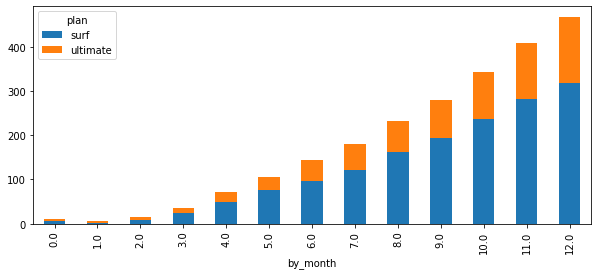

In [60]:
# Plot a bar plot to visualize it.
pd.crosstab(final_df['by_month'],final_df['plan']).plot(kind="bar",figsize= (10,4),stacked=True)


In [61]:
# Compare the number of minutes users of each plan require each month. Plot a histogram.
stat_2 =final_df.groupby(['plan','by_month'])['mins_per_month'].agg(number_of_mins=('count')).reset_index()
stat_2

,plan,by_month,number_of_mins
0,surf,0.0,6
1,surf,1.0,2
2,surf,2.0,9
3,surf,3.0,23
4,surf,4.0,50
5,surf,5.0,77
6,surf,6.0,97
7,surf,7.0,121
8,surf,8.0,162
9,surf,9.0,194


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f381e206f50>,
      dtype=object)

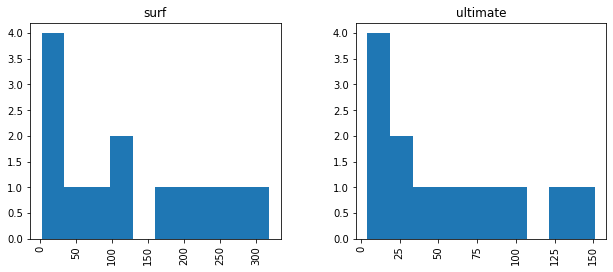

In [62]:
# Plot a histogram.
stat_2.number_of_mins.hist(by=stat_2['plan'], figsize =(10,4))


Calculate the mean and the variable of the call duration to reason on whether users on the different plans have different behaviours for their calls.

In [63]:
# Calculate the mean and the variance of the monthly call duration

final_df.groupby(['plan'])['mins_per_month'].agg(['mean','median', 'var']).reset_index()

,plan,mean,median,var
0,surf,427.120329,424.0,55455.577400
1,ultimate,428.071823,421.5,58543.878652


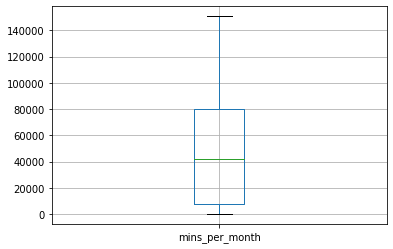

In [64]:
# Plot a boxplot to visualize the distribution of the monthly call duration (surf plan)
final_df.query('plan=="surf"').pivot_table(index='by_month',values = 'mins_per_month',aggfunc = 'sum').boxplot()


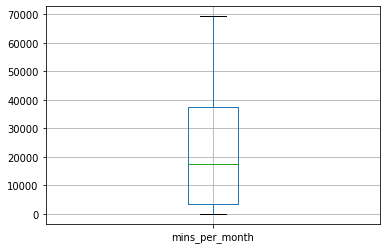

In [65]:
# Plot a boxplot to visualize the distribution of the monthly call duration(ultimate plan)
final_df.query('plan=="ultimate"').pivot_table(index='by_month',values = 'mins_per_month',aggfunc = 'sum').boxplot()

Formulating conclusions on how the users behave in terms of calling. Is their behaviour different between the plans?
### Conclusion
- There is no difference of the  behaviour between the plans. Avarage monthly call duration of booth palns almost same. Distribution scewed left.
- December, November, October have high duration of calls

### Messages

In [66]:
# Compare the number of messages users of each plan tend to send each month
stat_messages = final_df.groupby(['plan', 'by_month'])['messages_per_month'].agg(number_messages=('count')).reset_index() 
stat_messages

,plan,by_month,number_messages
0,surf,0.0,6
1,surf,1.0,2
2,surf,2.0,9
3,surf,3.0,23
4,surf,4.0,50
5,surf,5.0,77
6,surf,6.0,97
7,surf,7.0,121
8,surf,8.0,162
9,surf,9.0,194


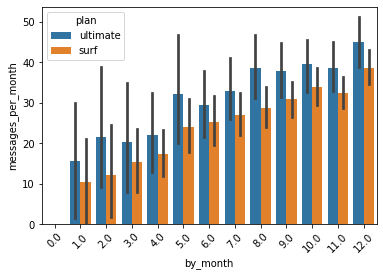

In [67]:
g =sns.barplot(x=final_df["by_month"],y=final_df["messages_per_month"], hue= "plan", data = final_df) 
g.set_xticklabels(g.get_xticklabels(), rotation=45)
plt.show()

### Conclusion
Formulating conclusions on how the users behave in terms of messaging. Is their behaviour different between the plans?
- There is differant benavious between plans. The ultimate plans users used more messages than surf users.


### Internet

In [68]:
# Compare the amount of internet traffic consumed by users per plan
stat_internet = final_df.groupby(['plan', 'by_month'])['gb_per_month'].agg(amount_traffic=('count')).reset_index() 
stat_internet

,plan,by_month,amount_traffic
0,surf,0.0,6
1,surf,1.0,2
2,surf,2.0,9
3,surf,3.0,23
4,surf,4.0,50
5,surf,5.0,77
6,surf,6.0,97
7,surf,7.0,121
8,surf,8.0,162
9,surf,9.0,194


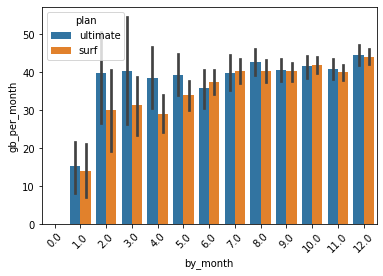

In [69]:
g1 =sns.barplot(x=final_df["by_month"],y=final_df["gb_per_month"], hue= "plan", data = final_df) 
g1.set_xticklabels(g1.get_xticklabels(), rotation=45)
plt.show()

### Conclusion 
-There is no difference using traffic between plans. That means users using same gb monthly
- Users  behaviour did not different between the plans.


## Revenue

Statistically describing the revenue between the plans.

In [70]:
# Compare Revenue by users per plan
stat_revenue = final_df.groupby(['plan'])['monthly_profit'].agg(revenue=('mean')).reset_index() 
stat_revenue

,plan,revenue
0,surf,261.121710
1,ultimate,96.095304


### Conclusion
Formulating conclusions about how the revenue differs between the plans.
- There is big differences in the revenue between plans. The surf plan  generete better profit than ultimate

# Test statistical hypotheses

Test the hypothesis that the average revenue from users of the Ultimate and Surf calling plans differs.

Formulate the null and the alternative hypotheses, choose the statistical test, decide on the alpha value.

### Ultimate and Surf calling plans 

- null hypothesis H₀:  the average revenue from users of the Ultimate and Surf calling plans are equal, there’s no difference.

- hypothesis H₁ :  the average revenue from users of the Ultimate and Surf calling plans  are  not equal, there is difference.
- alpha value - 5%


In [71]:
# Test the hypotheses

from scipy import stats as st
import numpy as np
surf_plan = final_df.query('plan == "surf"')
ultimate_plan = final_df.query('plan == "ultimate"')

#setting our statistical significance at 5%
alpha = 0.05 

results = st.ttest_ind(ultimate_plan['monthly_profit'], surf_plan['monthly_profit'], equal_var=False)


print('p-value:', results.pvalue)

#conditional statement
if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")




p-value: 2.348416390991648e-180
We reject the null hypothesis


### NY-NJ area and the users from other regions

- null hypothesis H₀:  the average revenue from users in NY-NJ area  are equal than other regions , there’s no difference.

- hypothesis H₁:  The average revenue from users in NY-NJ area is different from that of the users from other regions, there is difference.
- alpha value - 5%
- Before we going to testing we should retrive fragment NY- NJ from column 'city'

In [72]:
# Checking unigue values
final_df['city'].unique()

array(['Atlanta-Sandy Springs-Roswell, GA MSA',
       'Seattle-Tacoma-Bellevue, WA MSA',
       'Las Vegas-Henderson-Paradise, NV MSA', 'Tulsa, OK MSA',
       'Dallas-Fort Worth-Arlington, TX MSA',
       'San Francisco-Oakland-Berkeley, CA MSA',
       'Grand Rapids-Kentwood, MI MSA',
       'Orlando-Kissimmee-Sanford, FL MSA',
       'San Jose-Sunnyvale-Santa Clara, CA MSA',
       'Cleveland-Elyria, OH MSA',
       'Chicago-Naperville-Elgin, IL-IN-WI MSA', 'Knoxville, TN MSA',
       'New York-Newark-Jersey City, NY-NJ-PA MSA', 'Pittsburgh, PA MSA',
       'Fresno, CA MSA',
       'Washington-Arlington-Alexandria, DC-VA-MD-WV MSA',
       'Indianapolis-Carmel-Anderson, IN MSA', 'Jacksonville, FL MSA',
       'Los Angeles-Long Beach-Anaheim, CA MSA',
       'Omaha-Council Bluffs, NE-IA MSA',
       'Houston-The Woodlands-Sugar Land, TX MSA',
       'Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA',
       'Tampa-St. Petersburg-Clearwater, FL MSA',
       'Birmingham-Hoover, AL MSA'

- As we see the column city represented multytipe abbreviation elements states and combine by city so we going to retrieve fragment NY-NJ  using define function to return 'NY-NJ'

In [73]:
# Define function called region that takes the city as argument and Returns the string 'ny-nj'
def region(city): 
#creates a list fragments from the string value (by splitting the string at the commas). We call the list 'no_commas' 
   
    no_commas = city.split(",")
    for entry in no_commas:
        if ('NY-NJ' in entry)|(entry == 'NY')|(entry == 'NJ'):
            return 'ny-nj' 

        
final_df['region'] = final_df['city'].apply(region)


final_df['region'] = final_df['region'].fillna('other')

#this converts the values in the region column to the category type
final_df['region'] = final_df['region'].astype('category')




In [74]:
# let's check if function work
final_df.head()

,user_id,by_month,calls_per_month,mins_per_month,messages_per_month,gb_per_month,city,plan,monthly_profit,region
0,1000,12.0,16.0,124.0,11.0,4.0,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,0.00,other
1,1001,8.0,27.0,182.0,30.0,21.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,60.00,other
2,1001,9.0,49.0,315.0,44.0,41.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,260.00,other
3,1001,10.0,65.0,393.0,53.0,50.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,350.09,other
4,1001,11.0,64.0,426.0,36.0,49.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,340.00,other


In [75]:
# Let's see distribution of column 'region'
final_df['region'].value_counts() 

other    1925
ny-nj     378
Name: region, dtype: int64

In [76]:
# Test the hypotheses

ny_nj_users = final_df.query('region == "ny-nj"')
other_users = final_df.query('region == "other"')

#setting our statistical significance at 5%
alpha = 0.05 

results = st.ttest_ind(ny_nj_users['monthly_profit'], other_users['monthly_profit'], equal_var=False)


print('p-value:', results.pvalue)

#conditional statement
if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")


p-value: 0.00022081623901135797
We reject the null hypothesis


# General conclusion


1.In the data's preparation & exploration stage:

- We observed missing values in Dataframe:'df_internet', 'df_messages', 'df_plans', 'df_users' 
- The most missing values  'df_users' in column 'churn_date' and have 93.2%  of misslingness.

2.In the data transformation and data-cleaning process stage:

- We have missing values in user_df in column 'churn_date so it was repalced by end date acordding to documentation
- We fixed data type in columns 'message_date', 'calls_date',	'session_date' by conveting to Timestamp.
- We enriched data by adding additional factors to the data like column 'by_month' 
- We aggregate data per user per period (monthly) and culculate monthly revenue per users


3.In analysis stage to answer our questions we got next conclusion:

- There is no difference of the behaviour of calls duration between the plans. Avarage monthly call duration of booth palns almost same.Distribution scewed left.
December, November, October have high duration of calls.

- There is differant benaviour between plans. The ultimate plans users used more messages than surf users.
- There is no difference using traffic between plans. That means users using same gb monthly


- by Testing the hypothesis that the average revenue from users of the Ultimate and Surf calling plans differ and no equal.
- by testing the hypothesis that the average revenue from users in NY-NJ area are equal than other regions , there’s no difference.


